In [110]:
#coding:utf-8

from numpy import *
import numpy as np
import operator


#创建两组标签，四个点，同时每个点包含两个特征为了实现可视化
def creatDataSet():
	group = np.array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
	labels = ['A','A','B','B']
	return group,labels



#k-近邻算法
def classify0(inX, dataSet, labels, k):
    #计算距离
    #shape[0]表示第一维的长度
    dataSetSize = dataSet.shape[0]
    #tile将第二维数据重复dataSetSize次，第一维重复1次即不改变
    diffMat = tile(inX, (dataSetSize,1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    #选择距离最小的k个点
    sortedDistIndicies = distances.argsort()     
    classCount={}          
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    #注意dict的iteritems方法改名为items
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]


#将文本记录转换成Numpy解析程序
def file2matrix(filename):
    fr = open(filename)
    #得到文件行数
    numberOfLines = len(fr.readlines())
    #创建返回的矩阵,这里的3是为了方便处理
    returnMat = zeros((numberOfLines,3))        
    classLabelVector = []                          
    fr = open(filename)
    index = 0
    #解析文件数到列表
    for line in fr.readlines():
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index,:] = listFromLine[0:3]
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    return returnMat,classLabelVector


#对于不同的取值范围的数据一般进行归一化处理，减小数据对于特征的影响
#归一化特征值
def autoNorm(dataSet):
    #从列中选取最小值
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    
    normDataSet = dataSet - tile(minVals,(m,1))
    normDataSet = normDataSet/tile(ranges,(m,1))
    return normDataSet,ranges,minVals

#分类器针对约会网站的代码测试

def datingClassTest():
    hoRatio = 0.10
    datingDataMat,datingLabels = file2matrix('E:谢远东/机器学习/机器学习实践/机器学习实战源代码/machinelearninginaction/Ch02/datingTestSet2.txt')
    normMat,ranges,minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m*hoRatio)
    
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:],normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],4)
        print("the classifer came back with: %d,the real answer is : %d" % (classifierResult,datingLabels[i]))
        if (classifierResult != datingLabels[i]): errorCount += 1.0
        print("the total error rate is: %f" % (errorCount/float(numTestVecs)))
        print(errorCount)

#约会网站预测函数python3中将raw_input换成input
def classifyPerson():
    resultList = ['not at all','in small doses','in large doses']
    percentTats = float(input("花费在游戏上的时间百分比"))
    
    ffMiles = double(input("每年飞行的距离"))
    
    iceCream = float(input("每周吃冰淇淋公斤数"))
    
    datingDataMat,datingLabels = file2matrix('E:谢远东/机器学习/机器学习实践/机器学习实战源代码/machinelearninginaction/Ch02/datingTestSet2.txt')
    normMat,ranges,minVals = autoNorm(datingDataMat)
    
    inArr = array([ffMiles,percentTats,iceCream])
    
    classifierResult = classify0((inArr-minVals)/ranges,normMat,datingLabels,3)
    
    print("你可能喜欢这样的人",resultList[classifierResult - 1])
    
    
    
#将测试的txt文件中的内容转换成1*1024的向量    
def img2vector(filename):
    returnVect = zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0,32*i+j] = int(lineStr[j])
    return returnVect

import os
#使用k-Nei方法测试手写数字
def handwritingClassTest():
    #获取目录内容
    hwLabel = []
    trainingFileList = os.listdir("E:谢远东/机器学习/机器学习实践/机器学习实战源代码/machinelearninginaction/Ch02/digits/trainingDigits")
    #得到文件名和文件个数
    m = len(trainingFileList)
    trainingMat = zeros((m,1024))
    
    
    #从文件名解析分类数字
    for i in range(m):
        fileNameStr = trainingFileList[i]
        #得到文件的前缀
        fileStr =  fileNameStr.split('.')[0]
        #得到前缀的前缀即这个数字训练的实际的数字
        classNumStr = int(fileStr.split('_')[0])
        
        hwLabel.append(classNumStr)
        trainingMat[i,:] = img2vector('E:谢远东/机器学习/机器学习实践/机器学习实战源代码/machinelearninginaction/Ch02/digits/trainingDigits/%s' % fileNameStr)
    testFileList = os.listdir("E:谢远东/机器学习/机器学习实践/机器学习实战源代码/machinelearninginaction/Ch02/digits/testDigits")
    errorCount = 0.0
    mTest = len(testFileList)
    
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]     
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector('E:谢远东/机器学习/机器学习实践/机器学习实战源代码/machinelearninginaction/Ch02/digits/testDigits/%s' % fileNameStr)
        
        classifierResult = classify0(vectorUnderTest,trainingMat,hwLabel,3)
        print("the classifier came back with: %d, the real answer is: %d" % (classifierResult, classNumStr))
        if (classifierResult != classNumStr): errorCount += 1.0
    print("\nthe total number of errors is: %d" % errorCount)
    print("\nthe total error rate is: %f" % (errorCount/float(mTest)))

In [18]:
group, labels = creatDataSet()
group

array([[ 1. ,  1.1],
       [ 1. ,  1. ],
       [ 0. ,  0. ],
       [ 0. ,  0.1]])

In [19]:
labels

['A', 'A', 'B', 'B']

In [22]:
classify0([1,1],group,labels,3)

'A'

In [38]:
#约会网站例子,数据在E:\谢远东\机器学习\机器学习实践\机器学习实战源代码\machinelearninginaction\Ch02\datingTestSet.txt

#注意数据错误使用datingTestSet2.txt
datingDataMat,datingLabels = file2matrix('E:谢远东/机器学习/机器学习实践/机器学习实战源代码/machinelearninginaction/Ch02/datingTestSet2.txt')
datingDataMat

array([[  4.09200000e+04,   8.32697600e+00,   9.53952000e-01],
       [  1.44880000e+04,   7.15346900e+00,   1.67390400e+00],
       [  2.60520000e+04,   1.44187100e+00,   8.05124000e-01],
       ..., 
       [  2.65750000e+04,   1.06501020e+01,   8.66627000e-01],
       [  4.81110000e+04,   9.13452800e+00,   7.28045000e-01],
       [  4.37570000e+04,   7.88260100e+00,   1.33244600e+00]])

In [42]:
datingLabels[0:20]

[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3]

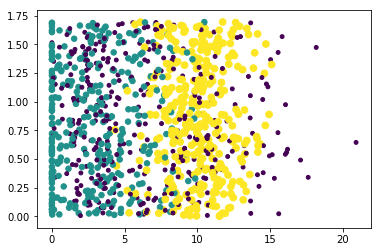

In [49]:
#对数据进行可视化
import matplotlib
import matplotlib.pylab as plt
fig = plt.figure()

ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:,1],datingDataMat[:,2],15.0*array(datingLabels),15.0*array(datingLabels))
plt.show()

59263, 4.712233, class1
79095, 11.149473, class1
64592, 9.967434, class1
31209, 2.268799, class1
66341, 6.088149, class1
16310, 1.820145, class2
31687, 12.476101, class3
48657, 12.919232, class3
15923, 2.572424, class2
15612, 4.537931, class2
69941, 8.574855, class1
39742, 7.774537, class3
79820, 13.155830, class1
46630, 10.430709, class3
6839, 2.947724, class2
4504, 0.405266, class2
50568, 8.466008, class3
16135, 2.189377, class2
39108, 8.838543, class3
6378, -2.609144, class2
30880, 10.355095, class3
7424, 3.629118, class2
27602, 2.833099, class1
6257, 5.860042, class2
19635, 9.970020, class3
35305, 12.788801, class3
27658, 1.772082, class1
19470, 6.604572, class2
75689, 14.497210, class1
55421, 2.741149, class1
38594, 9.132351, class3
36909, 12.109206, class3
12186, 5.187013, class2
37826, 8.062085, class3
43127, 9.850089, class3
73695, 10.406342, class1
40652, 11.045051, class3
16980, 4.789080, class2
25349, 6.774668, class3
50648, 2.863107, class1
68341, 4.255908, class1
27062, 8.

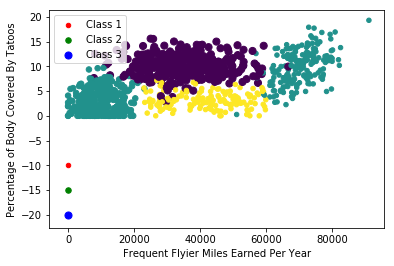

In [55]:
from numpy import *
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


n = 1000 #number of points to create
xcord = zeros((n))
ycord = zeros((n))
markers =[]
colors =[]
fw = open('E:谢远东/机器学习/机器学习实践/机器学习实战源代码/machinelearninginaction/Ch02/datingTestSet2.txt','w')
for i in range(n):
    [r0,r1] = random.standard_normal(2)
    myClass = random.uniform(0,1)
    if (myClass <= 0.16):
        fFlyer = random.uniform(22000, 60000)
        tats = 3 + 1.6*r1
        markers.append(20)
        colors.append(2.1)
        classLabel = 1 #'didntLike'
        print(("%d, %f, class1") % (fFlyer, tats))
    elif ((myClass > 0.16) and (myClass <= 0.33)):
        fFlyer = 6000*r0 + 70000
        tats = 10 + 3*r1 + 2*r0
        markers.append(20)
        colors.append(1.1)
        classLabel = 1 #'didntLike'
        print(("%d, %f, class1") % (fFlyer, tats))
    elif ((myClass > 0.33) and (myClass <= 0.66)):
        fFlyer = 5000*r0 + 10000
        tats = 3 + 2.8*r1
        markers.append(30)
        colors.append(1.1)
        classLabel = 2 #'smallDoses'
        print(("%d, %f, class2") % (fFlyer, tats))
    else:
        fFlyer = 10000*r0 + 35000
        tats = 10 + 2.0*r1
        markers.append(50)
        colors.append(0.1)
        classLabel = 3 #'largeDoses'
        print(("%d, %f, class3") % (fFlyer, tats))
    if (tats < 0): tats =0
    if (fFlyer < 0): fFlyer =0
    xcord[i] = fFlyer; ycord[i]=tats
    fw.write("%d\t%f\t%f\t%d\n" % (fFlyer, tats, random.uniform(0.0, 1.7), classLabel))

fw.close()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xcord,ycord, c=colors, s=markers)
type1 = ax.scatter([-10], [-10], s=20, c='red')
type2 = ax.scatter([-10], [-15], s=30, c='green')
type3 = ax.scatter([-10], [-20], s=50, c='blue')
ax.legend([type1, type2, type3], ["Class 1", "Class 2", "Class 3"], loc=2)
#ax.axis([-5000,100000,-2,25])
plt.xlabel('Frequent Flyier Miles Earned Per Year')
plt.ylabel('Percentage of Body Covered By Tatoos')
plt.show()

In [63]:
normMat,ranges,minVals = autoNorm(datingDataMat)
normMat

array([[ 0.44832535,  0.39805139,  0.56233353],
       [ 0.15873259,  0.34195467,  0.98724416],
       [ 0.28542943,  0.06892523,  0.47449629],
       ..., 
       [ 0.29115949,  0.50910294,  0.51079493],
       [ 0.52711097,  0.43665451,  0.4290048 ],
       [ 0.47940793,  0.3768091 ,  0.78571804]])

In [64]:
ranges

array([  9.12730000e+04,   2.09193490e+01,   1.69436100e+00])

In [65]:
minVals

array([ 0.      ,  0.      ,  0.001156])

In [75]:
datingClassTest()

the classifer came back with: 1,the real answer is : 1
the total error rate is: 0.000000
0.0
the classifer came back with: 1,the real answer is : 1
the total error rate is: 0.000000
0.0
the classifer came back with: 1,the real answer is : 1
the total error rate is: 0.000000
0.0
the classifer came back with: 1,the real answer is : 1
the total error rate is: 0.000000
0.0
the classifer came back with: 1,the real answer is : 1
the total error rate is: 0.000000
0.0
the classifer came back with: 2,the real answer is : 2
the total error rate is: 0.000000
0.0
the classifer came back with: 3,the real answer is : 3
the total error rate is: 0.000000
0.0
the classifer came back with: 3,the real answer is : 3
the total error rate is: 0.000000
0.0
the classifer came back with: 2,the real answer is : 2
the total error rate is: 0.000000
0.0
the classifer came back with: 2,the real answer is : 2
the total error rate is: 0.000000
0.0
the classifer came back with: 1,the real answer is : 1
the total error

In [85]:
classifyPerson()

花费在游戏上的时间百分比10
每年飞行的距离20000
每周吃冰淇淋公斤数2
你可能喜欢这样的人 in large doses


In [91]:
#手写识别系统
#第一步，将32*32的数据读取成一个1*1024的向量
testVector = img2vector("E:谢远东/机器学习/机器学习实践/机器学习实战源代码/machinelearninginaction/Ch02/digits/testDigits/0_13.txt")
testVector[0,0:30]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.])

In [111]:
handwritingClassTest()

the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answe